# Competencia de convolucionales





Es un ejemplo clásico de competencias estudiantiles y académicas.

Oxford 102 Flower La descripción está en el siguiente link:

* https://www.robots.ox.ac.uk/~vgg/data/flowers/102/

Se les entrega la estructura general del problema, y se les pide que propongan una red convolucional.

El resultado del profesor - Accuracy en el test: 80%

1. Quien supera al profesor tiene un 4.0
2. Quien tenga el mayor resultado tiene un 7.0
3. Todos los demás tendrán notas proporcionales a la escala que se forme entre todos los resultados del curso.

Reglas:

1. Deben utilizar los datos de Oxford 102 Flower como base.
2. Pueden utilizar cualquier técnica de regularización, optimización, aumentar/disminuir train, padding, etc.
3. Si utilizan alguna técnica o arquitectura no vista en clases DEBEN explicarla en detalle en el informe.
4. Pueden utilizar o MLP o CNN, se recomienda CNN.
5. Puede ser individual o de a dos personas.
6. Deben reportar resultados intermedios y también deben reportar el proceso de análisis o metodología que aplicaron para definir la arquitectura que finalmente utilizaron. Este reporte/informe, puede ser en un Word adicional al Notebook, o pueden ser módulos de texto ordenados en conjunto (al final por ejemplo) con el Notebook de resultados.
7. Los resultados serán públicos, y se medirá por parte del ayudante a todos con un mismo conjunto de test, el cuales ustedes no conocen. (se entegará al final en conjunto con los resultados del concurso)

Uso de PC:

Podrán hacer uso de un PC de la facultad mediante TeamViewer para entrenar a sus agentes. Se coordinara oportunamente via Canvas.
1. El mal uso o falta de tiempo en el PC no es excusa para no entregar la tarea. Deben tener un codigo funcional e idealmente algun agente ya entrenado al momento de tener acceso.
2. Para un uso eficiente, usar para entrenar a su agente final, no para programar.
3. Deben tener conocimientos de uso de Visual Studio Code (Para que efectivamente usen las capacidades del computador) No tiene sentido que usen Colab en este computador.

Entregables:

i. Archivo con el Notebook

ii. Archivo con informe (en Word o dentro del Notebook)

ii. Archivo con los pesos del modelo

## Se extrae la información de la base de datos


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import os
import requests
import json
import numpy as np

c:\Users\USER\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# Note que acá ya tiene los datos
dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

## Visualización

In [3]:
# Imprimimos info del dataset
print(f"Numero de datos de entrenamiento: {dataset_info.splits['train'].num_examples}")
print(f"Numero de datos de validacion: {dataset_info.splits['validation'].num_examples}")
print(f"Numero de datos de testeo: {dataset_info.splits['test'].num_examples}")

no_classes = dataset_info.features['label'].num_classes
print(f"Numero de clases: {no_classes}")

Numero de datos de entrenamiento: 1020
Numero de datos de validacion: 1020
Numero de datos de testeo: 6149
Numero de clases: 102


In [4]:
#Imprimimos forma de las 3 primeras imagenes
for feature, label in dataset['train'].take(3):
    print(feature.shape)

(500, 667, 3)
(500, 666, 3)
(670, 500, 3)


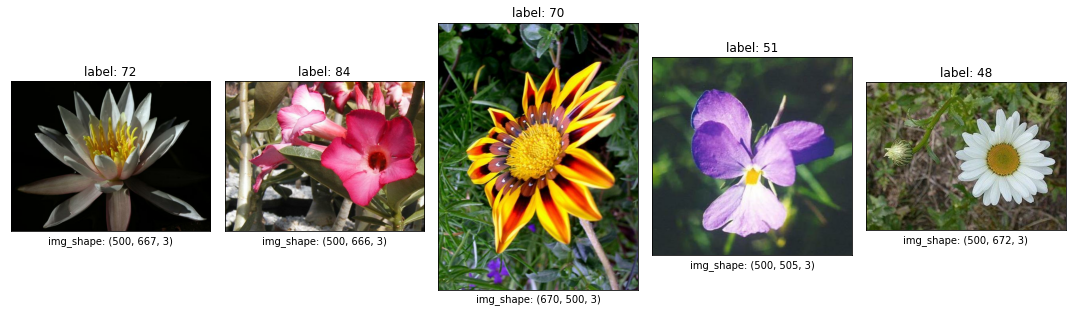

In [5]:
# Visualizamos los datos
fig = plt.figure(figsize=(15,15))
i=0
for image, label in dataset['train'].take(5):
    ax = fig.add_subplot(1,5,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(image)
    plt.title(f"label: {label}")
    plt.xlabel(f"img_shape: {image.shape}")
    i=i+1;
fig.tight_layout()

OJO: tamaño de las imagenes NO es constante...

También necesitarás cargar un mapeo de etiquetas a nombres de categorías. Puedes encontrar esto en el archivo label_map.json. Es un objeto JSON que puedes leer con el módulo json. Esto te proporcionará un diccionario que mapea las etiquetas codificadas como enteros a los nombres reales de las flores.

In [6]:
file_location='https://github.com/CheloGE/ML-tensorflow-Image_classifier-oxford_flowers102/blob/master/label_map.json?raw=1'
r = requests.get(file_location, stream=True)
class_names=json.loads(r.content.decode('utf-8'))
class_names = {int(k):v for k,v in class_names.items()}

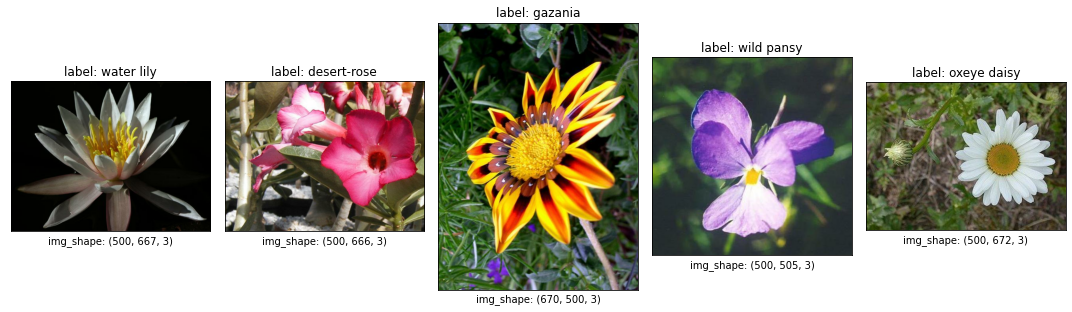

In [7]:
fig = plt.figure(figsize=(15,15))
i=0
for image, label in dataset['train'].take(5):
    ax = fig.add_subplot(1,5,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(image)
    plt.title(f"label: {class_names[label.numpy()+1]}")
    plt.xlabel(f"img_shape: {image.shape}")
    i=i+1;
fig.tight_layout()

## Valida el balance

In [8]:
# Separacion de conjuntos de datos
train_set = dataset['train']
test_set = dataset['test']
validation_set = dataset['validation']

In [9]:
# Balance de entrenamiento
labels = np.array(list(test_set.map(lambda x, y: y).as_numpy_iterator()))

# Obtenemos clases unicas y su cantidad
classes, counts = np.unique(labels, return_counts=True)

# Imprimimos
print("Class   | Count")
print("----------------")

for class_name, count in zip(classes, counts):
    print(f"{class_name}       | {count}")

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Class   | Count
----------------
0       | 20
1       | 40
2       | 20
3       | 36
4       | 45
5       | 25
6       | 20
7       | 65
8       | 26
9       | 25
10       | 67
11       | 67
12       | 29
13       | 28
14       | 29
15       | 21
16       | 65
17       | 62
18       | 29
19       | 36
20       | 20
21       | 39
22       | 71
23       | 22
24       | 21
25       | 21
26       | 20
27       | 46
28       | 58
29       | 65
30       | 32
31       | 25
32       | 26
33       | 20
34       | 23
35       | 55
36       | 88
37       | 36
38       | 21
39       | 47
40       | 107
41       | 39
42       | 110
43       | 73
44       | 20
45       | 176
46       | 47
47       | 51
48       | 29
49       | 72
50       | 238
51       | 65
52       | 73
53       | 41
54       | 51
55       | 89
56       | 47
57       | 94
58       | 47
59       | 89
60       | 30
61       | 35
62       | 34
63       | 32
64       | 82
65       | 41
66       | 22
67       | 34
68       | 34
69     

In [10]:
# Balance de entrenamiento
labels = np.array(list(train_set.map(lambda x, y: y).as_numpy_iterator()))

# Obtenemos clases unicas y su cantidad
classes, counts = np.unique(labels, return_counts=True)

# Imprimimos
print("Class   | Count")
print("----------------")

for class_name, count in zip(classes, counts):
    print(f"{class_name}       | {count}")

Class   | Count
----------------
0       | 10
1       | 10
2       | 10
3       | 10
4       | 10
5       | 10
6       | 10
7       | 10
8       | 10
9       | 10
10       | 10
11       | 10
12       | 10
13       | 10
14       | 10
15       | 10
16       | 10
17       | 10
18       | 10
19       | 10
20       | 10
21       | 10
22       | 10
23       | 10
24       | 10
25       | 10
26       | 10
27       | 10
28       | 10
29       | 10
30       | 10
31       | 10
32       | 10
33       | 10
34       | 10
35       | 10
36       | 10
37       | 10
38       | 10
39       | 10
40       | 10
41       | 10
42       | 10
43       | 10
44       | 10
45       | 10
46       | 10
47       | 10
48       | 10
49       | 10
50       | 10
51       | 10
52       | 10
53       | 10
54       | 10
55       | 10
56       | 10
57       | 10
58       | 10
59       | 10
60       | 10
61       | 10
62       | 10
63       | 10
64       | 10
65       | 10
66       | 10
67       | 10
68       | 10
69       | 

In [11]:
print(len(classes))
num_classes = len(classes)

102


## Preprocesamiento, escalamiento, manejo previo que usted 

Primero se definen funciones para los procesos de **normalización**, **escalamiento** y *One-hot encode*.

* El proceso de **normalización** consiste en ajusta los valores de los píxeles de una imagen para que estén dentro de un rango en específico, que en este caso es -1 y 1. Esto ayuda en el entrenamiento ya que estandariza las imagenes.

* El proceso de **escalamiento** simplemente cambia el tamaño de la imagen para que tenga dimensiones específicas, que dependen del modelo a entrenar. En este caso particular, el modelo utiliza dimensiones de $224\times 224$.

* Por último, la codificación *One-hot encode* consiste en que en vez de utilizar una etiqueta numérica, se crea un vector binario de longitud igual al número de categorías. Entonces, cada posición en el vector corresponde a una categoría, lo que permite representar categorías de manera única y conveniente.

In [12]:
target_size = (224, 224)

def normalize_image(images, a=-1, b=1, minPix=[0], maxPix=[255]):

    a = tf.constant([a], dtype=tf.float32)
    b = tf.constant([b], dtype=tf.float32)
    min_pixel = tf.constant(minPix, dtype=tf.float32)
    max_pixel = tf.constant(maxPix, dtype=tf.float32)

    return a + (((images - min_pixel)*(b - a) )/(max_pixel - min_pixel))

def resize_image(image, size=target_size):
    return tf.image.resize(image, size)

def oneHotEncode(labels, num_classes):
    return tf.one_hot(labels, num_classes)

### Consolidación funciones

Ahora, se definen dos funciones, esto debido a que los preprocesamientos para los diferentes *sets* de datos difieren. La función ```preprocess_normal``` se ocupa para los *sets* de datos de testeo y validación. Por otro lado, la función ```preprocess_data_augmentation``` se ocupa para el *set* de entrenamiento.

Es importante desatacar que si bien la segunda función mencionada no aplica al pie de la letra un aumento de los datos, si permite introducir variabilidad a estos últimos, lo cual puede ayudar a que el modelo sea más robusto al aprender y reconoer los patrones de imágenes que pueden tener diferentes orientaciones, tamaños y reflejos.

Por último, también se definen el tamaño de los ```batch```, y el ```buffer_size```, que es un parámetro de la función ```shuffle()``` que se utiliza para controlar cuántos elementos se tomarán del conjunto de datos antes de realizar la operación de mezcla. El objetivo principal de lo último, es mezclar los datos de entrenamiento de forma efectiva.

In [13]:
def preprocess_normal(image, label):
    images = normalize_image(resize_image(image))
    labels = oneHotEncode(label, num_classes)
    return images, labels

def preprocess_data_augmentation(image,label):
    image = normalize_image(resize_image(image))
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    labels = oneHotEncode(label, num_classes)
    return image, labels

In [14]:
buffer_size = 500
batch_size = 128

train_set = train_set.shuffle(buffer_size).map(preprocess_data_augmentation).batch(batch_size)
test_set = test_set.map(preprocess_normal).batch(batch_size)
validation_set = validation_set.map(preprocess_normal).batch(batch_size)

## Haga su modelo

En esta sección se utilizó un modelo pre-entrenado. Algunos de los beneficios que tiene hacer esto incluyen, ya han aprendido características y patrones útiles en datos similares, mejora el rendimiento, requieren de menos datos, entre otras. Por ende, considerando que la cantidad de datos de entrenamiento de los datos de ```Oxford_flowers102``` es realtivamnte pequeño, la utilización estos modelos es la mejor opción.

## Base (MobileNetV2)

In [26]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy

num_classes = len(classes)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


base_model = MobileNetV2(weights='imagenet', include_top=False, alpha=0.75, input_shape=(224, 224, 3))

# Se congelan las capas de modelo base
for layer in base_model.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = layers.Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)  


model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer=Adam(learning_rate=0.004),
              loss=CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

history = model.fit(train_set, epochs=60, validation_data=validation_set, callbacks=[callback])


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 24  648         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 24  96          ['Conv1[0][0]']                  
                                )                                                           

## Grafique los resultados del entrenamiento

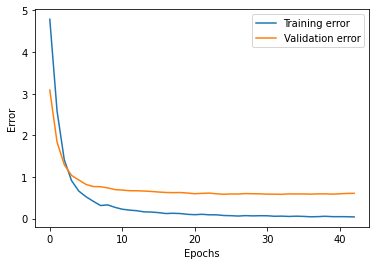

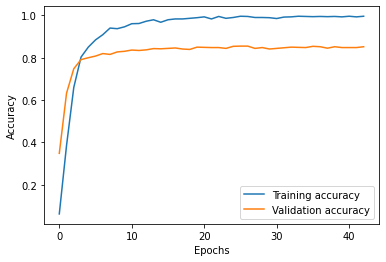

In [27]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label = 'Training error')
plt.plot(val_loss, label = 'Validation error')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend(loc = 'upper right')
plt.show()

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label = 'Training accuracy')
plt.plot(val_acc, label = 'Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc = 'lower right')

## Vea el desempeño del modelo

En esta sección se revisa la métrica de rendimiento del modelo en el ```test_set```, se guardan los pesos y se muestra la matriz de confusión.

In [28]:
loss, acc = model.evaluate(validation_set)

print(f'Generalization error: {loss}')
print(f'Acccuracy: {acc:.3f}')

8/8 [==============================] - 23s 3s/step - loss: 0.6070 - accuracy: 0.8520
Generalization error: 0.6070372462272644
Acccuracy: 0.852


### Matriz de confusión

Se observa que la mayoría de los valores se encuentran en la diagonal, lo cual es bueno ya que indica que el modelo predice de buena forma las diferentes clases.

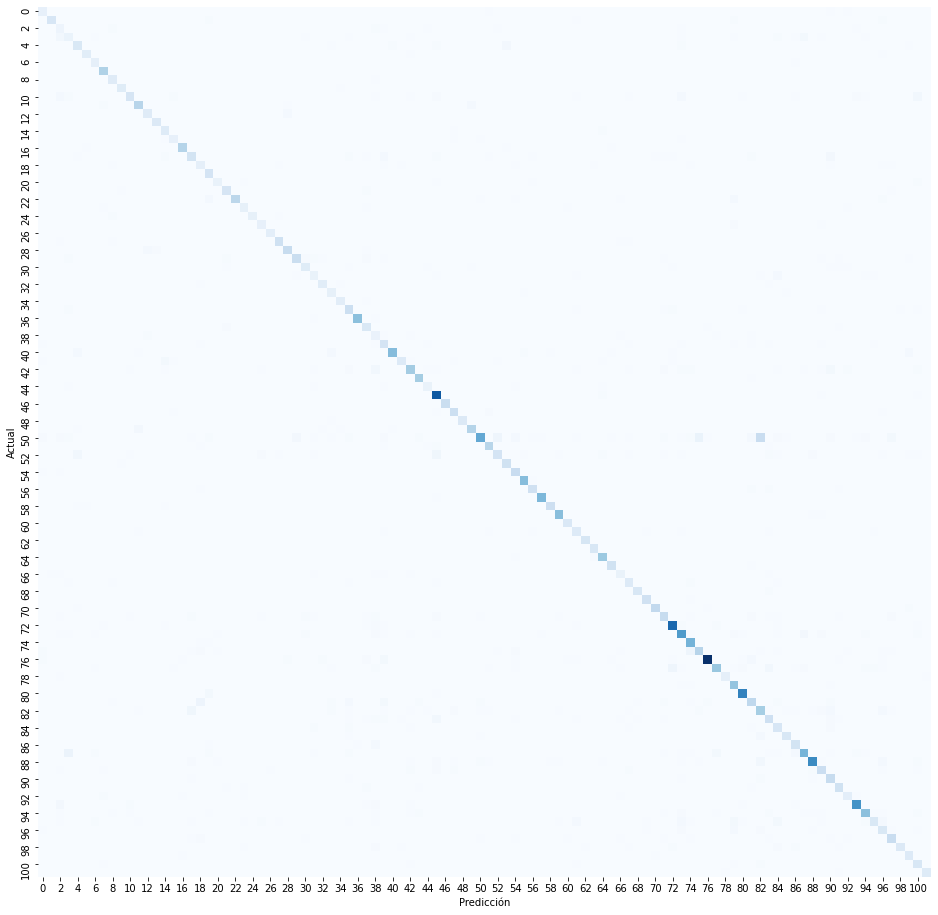

In [50]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


actual_labels_indices = []
predicted_labels_indices = []

for batch in test_set:
    actual_labels_batch = np.argmax(batch[1], axis=1) 
    actual_labels_indices.extend(actual_labels_batch)
    predicted_labels_indices.extend(np.argmax(model.predict(batch[0],verbose = 0), axis=1))

conf_matrix = confusion_matrix(actual_labels_indices, predicted_labels_indices)

plt.figure(figsize=(16, 16))

sns.heatmap(conf_matrix, annot=False, cbar=False, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Actual")

plt.show()


### Guardado del modelo

In [51]:
model.save_weights('Pesos_modelo_AA')